In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report


In [203]:

def drop_columns(df, columns):
    """
    Menghapus kolom-kolom yang diberikan dari DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame asli.
    columns (list of str): Daftar nama kolom yang akan dihapus.

    Returns:
    pd.DataFrame: DataFrame setelah kolom-kolom dihapus.
    """
    return df.drop(columns=columns, axis=1)

In [204]:
# Membaca dataset
df = pd.read_csv('sample_data/loan_data.csv')
df.head()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
    'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
    'total_cu_tl', 'inq_last_12m', 'dti_joint', 'verification_status_joint',
    'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
    'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il' ,'annual_inc_joint' ,
    'mths_since_last_major_derog'
]
# Menghapus kolom-kolom yang diberikan
df = drop_columns(df, columns_to_drop)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1.0,INDIVIDUAL,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1.0,INDIVIDUAL,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1.0,INDIVIDUAL,0.0


In [206]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

# Menampilkan statistik deskriptif untuk kolom kategorikal
df.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,16754,16754,16754,15655,16169,16754,16754,16754,16754,16754,...,16754,16754,16754,16754,16754,16754,16721,1634,16753,16753
unique,2,7,35,13234,11,4,3,9,7,1,...,13,6786,753,45,498,1,57,2,57,1
top,36 months,B,B3,US Army,10+ years,MORTGAGE,Verified,Dec-11,Fully Paid,n,...,debt_consolidation,Debt Consolidation Loan,100xx,CA,Nov-98,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,11005,5115,1415,58,4251,7906,6079,2267,12606,16754,...,8266,1335,226,2974,168,16754,1144,1316,6479,16753


In [207]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['emp_title', 'url', 'title', 'desc', 'earliest_cr_line','zip_code']
df = df.drop(columns=columns_to_drop)

# Menampilkan beberapa baris pertama setelah penghapusan kolom
df.head()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1.0,INDIVIDUAL,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1.0,INDIVIDUAL,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1.0,INDIVIDUAL,0.0


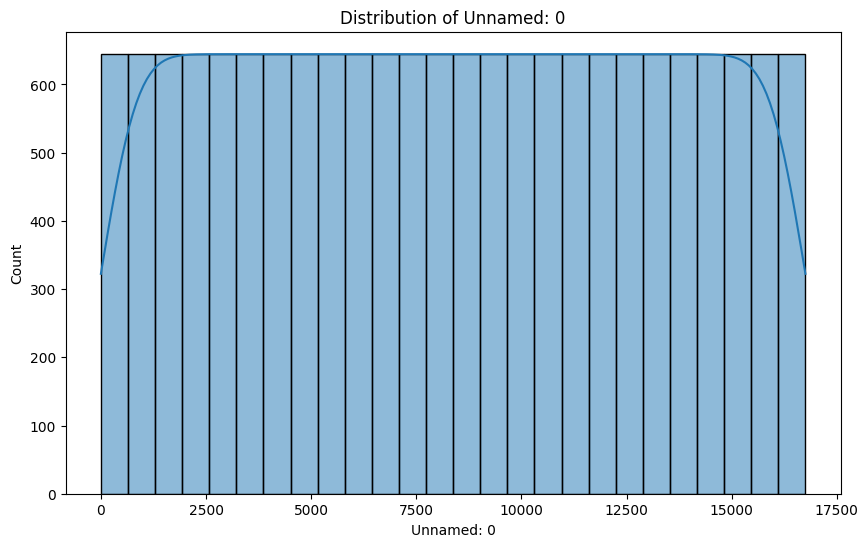

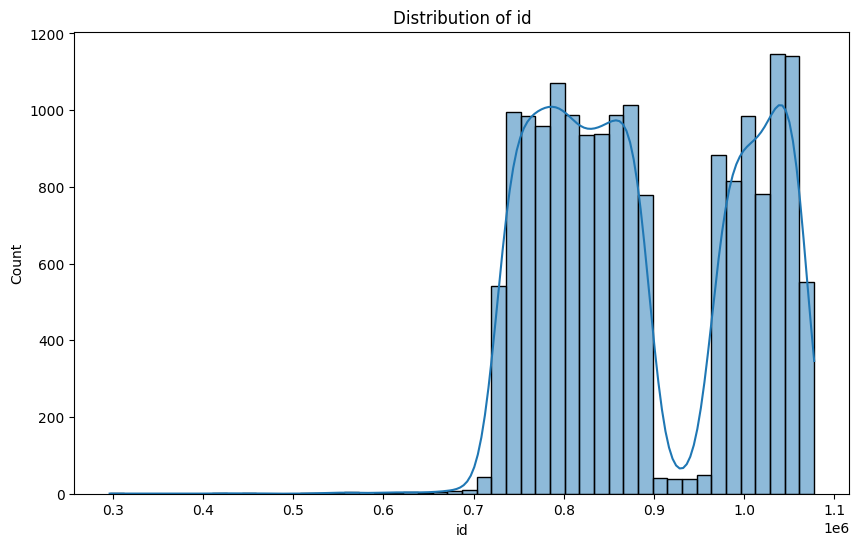

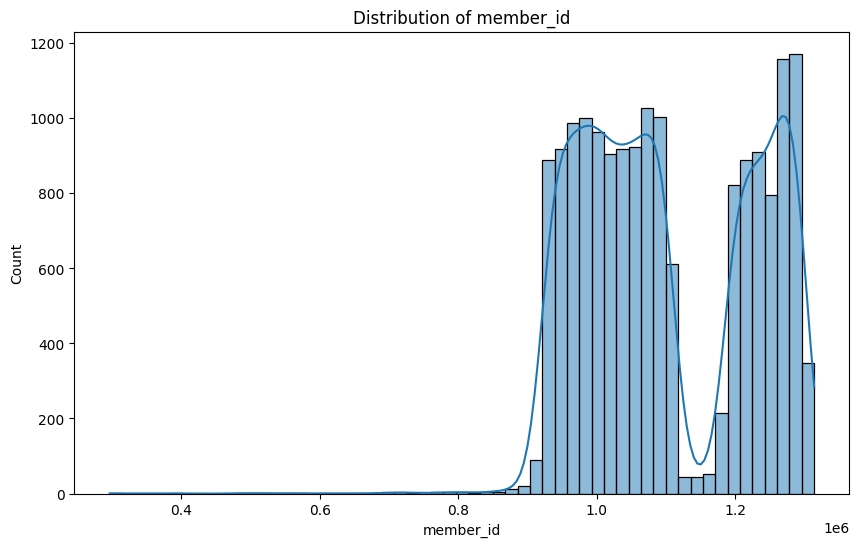

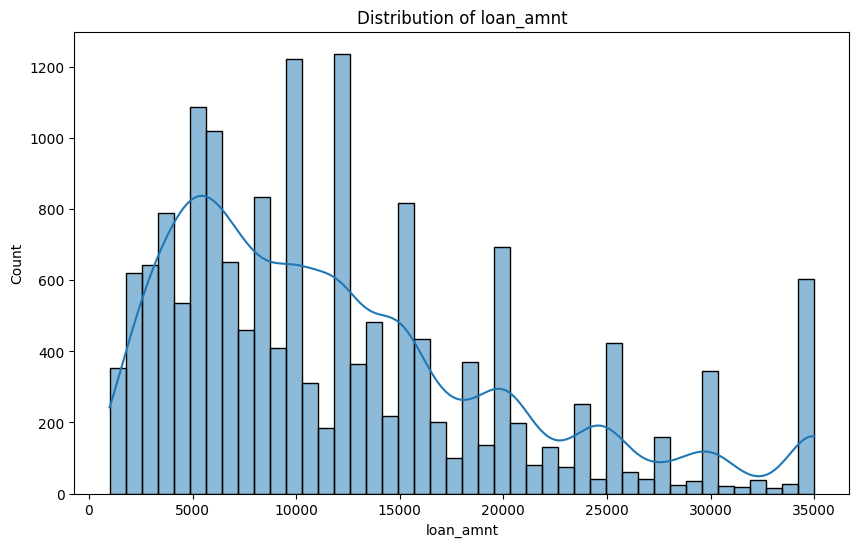

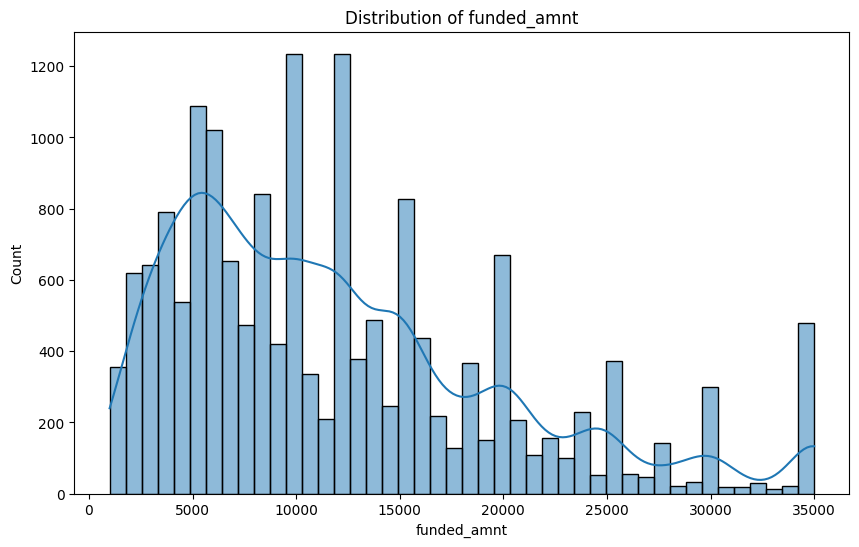

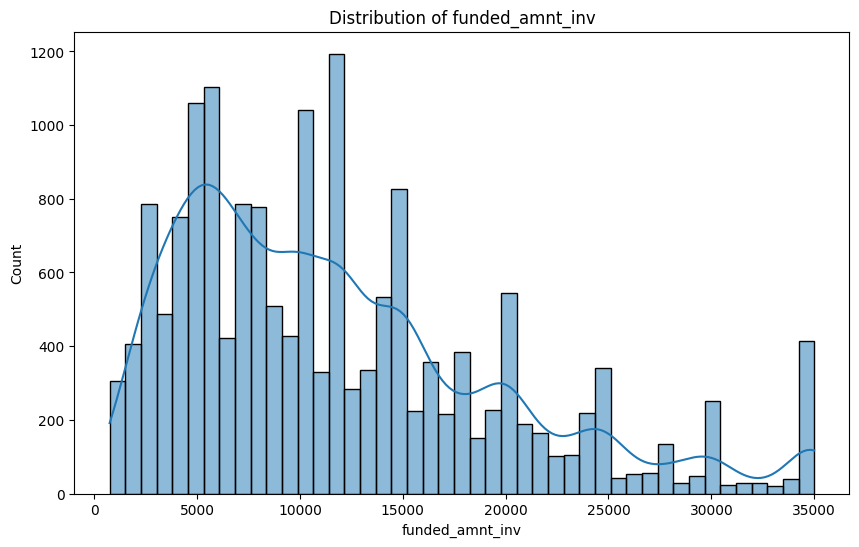

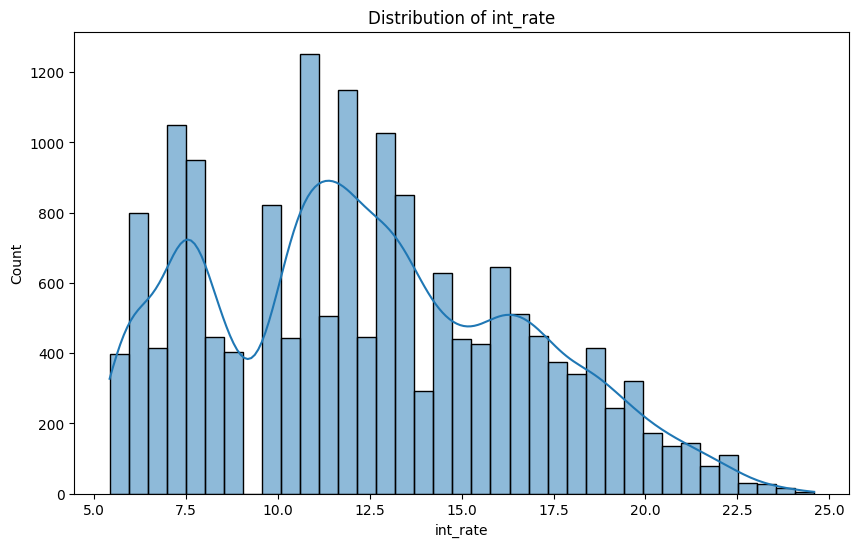

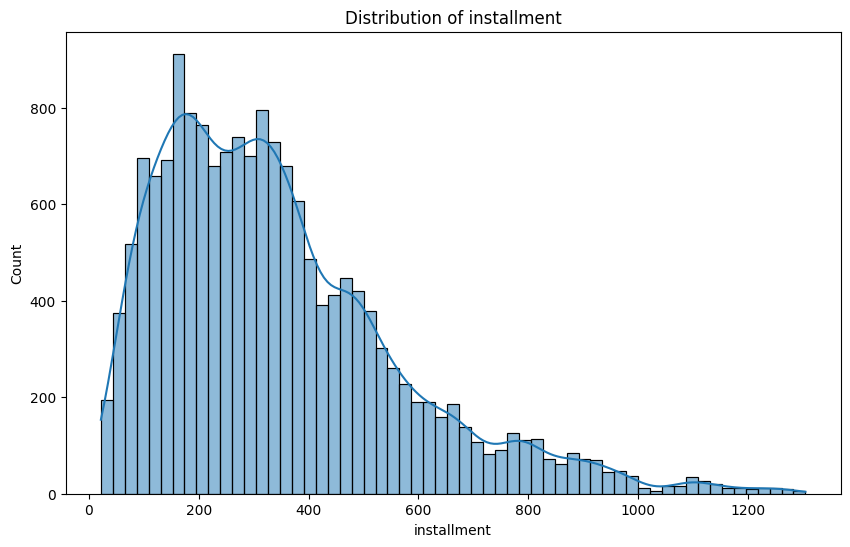

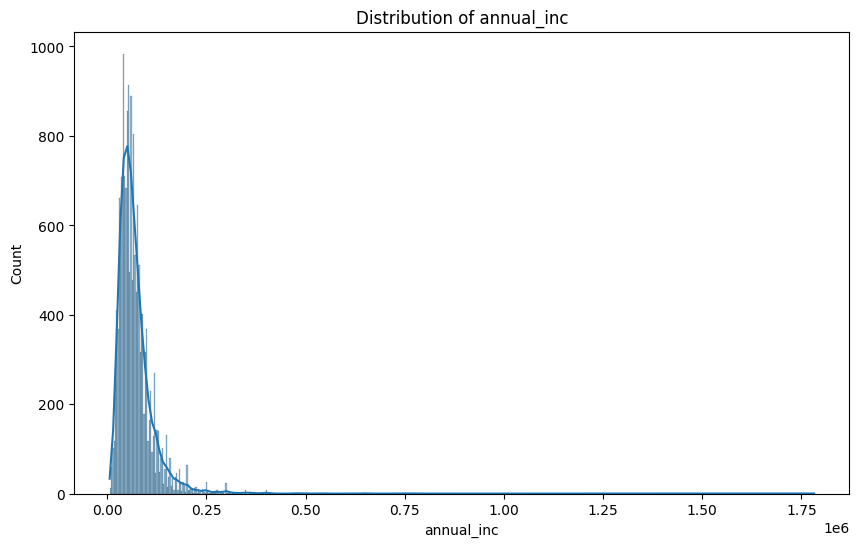

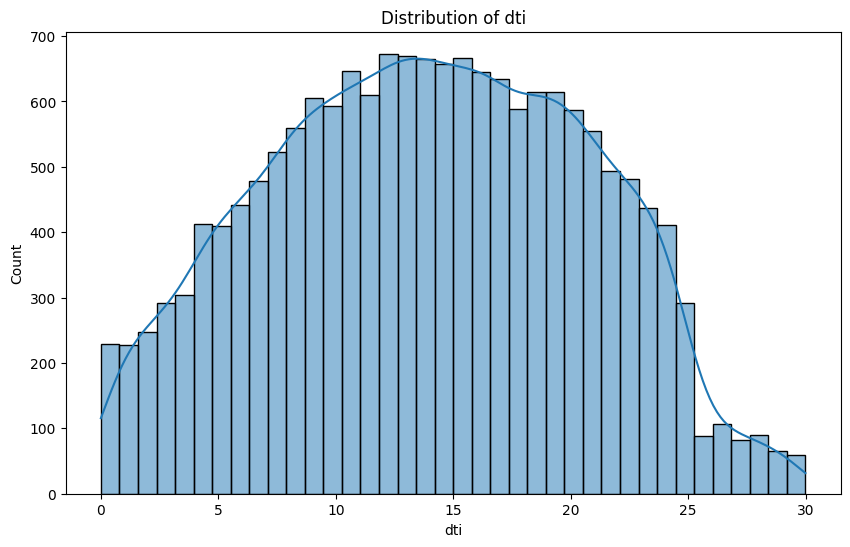

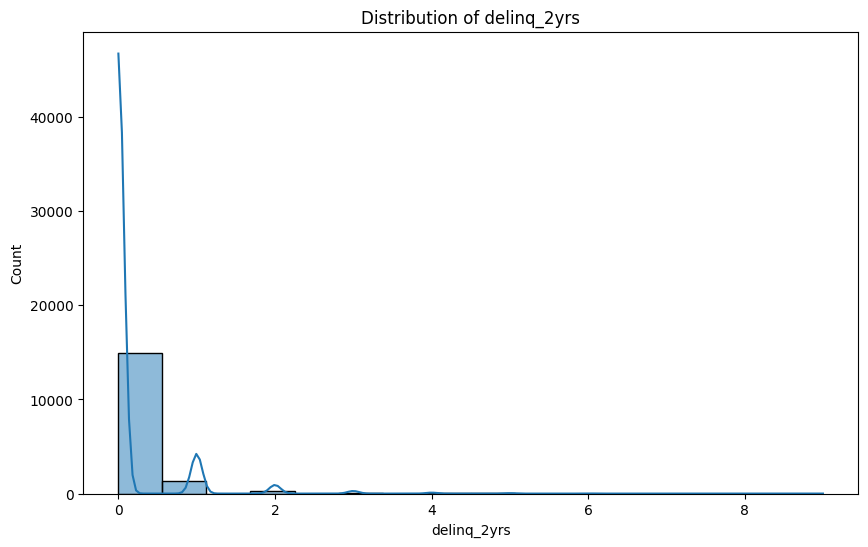

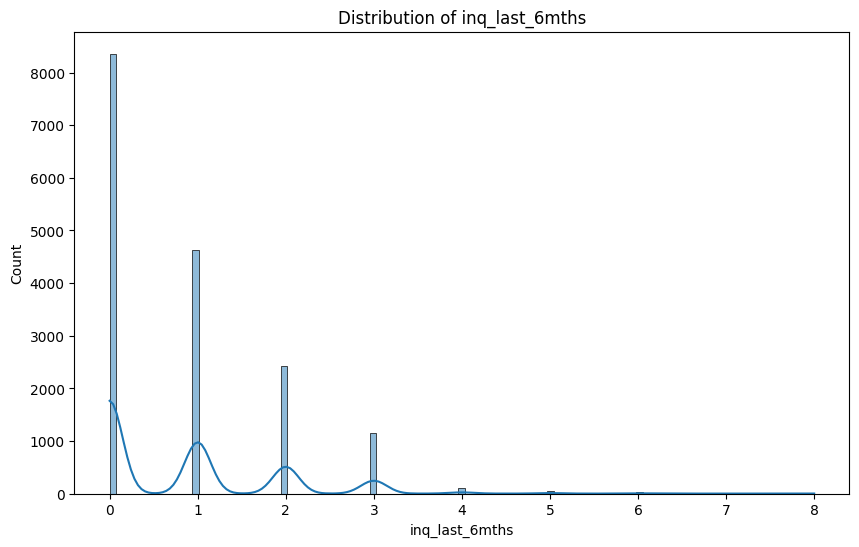

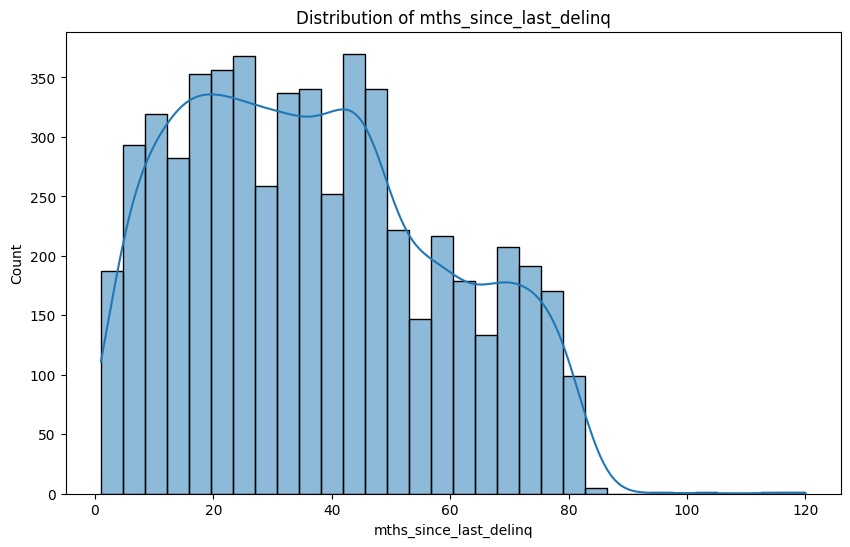

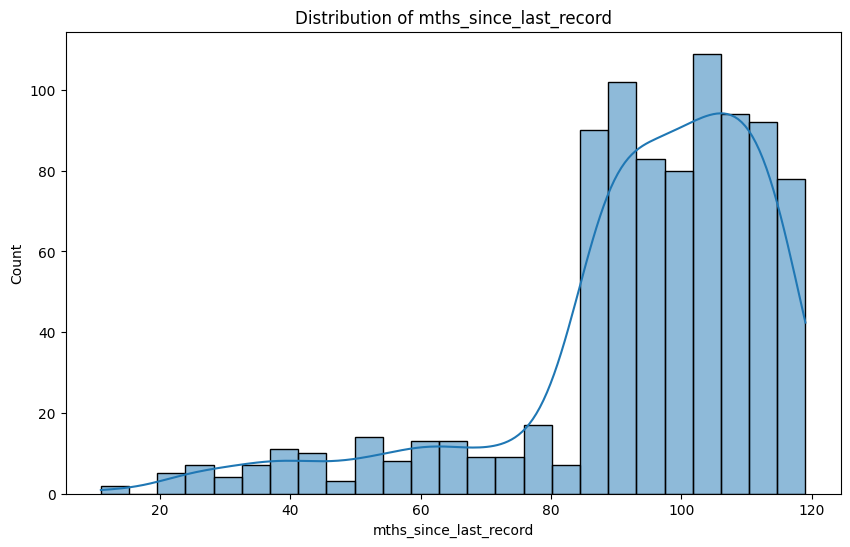

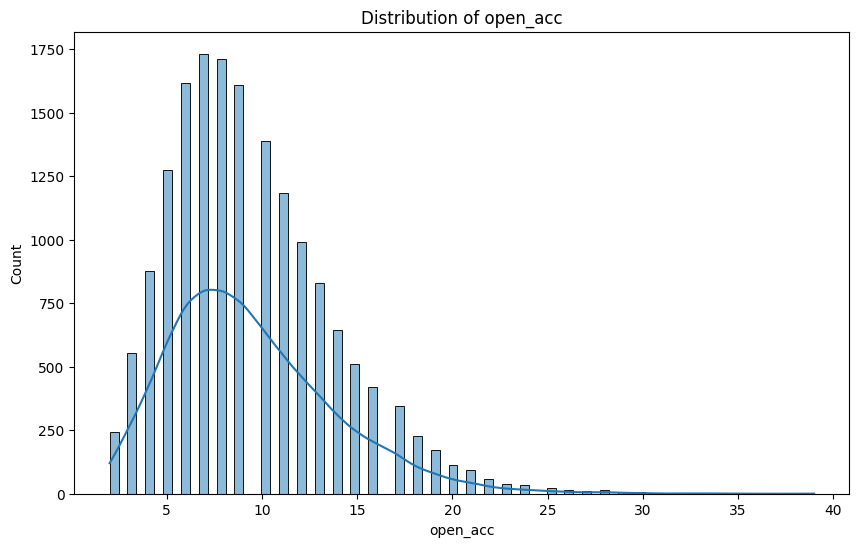

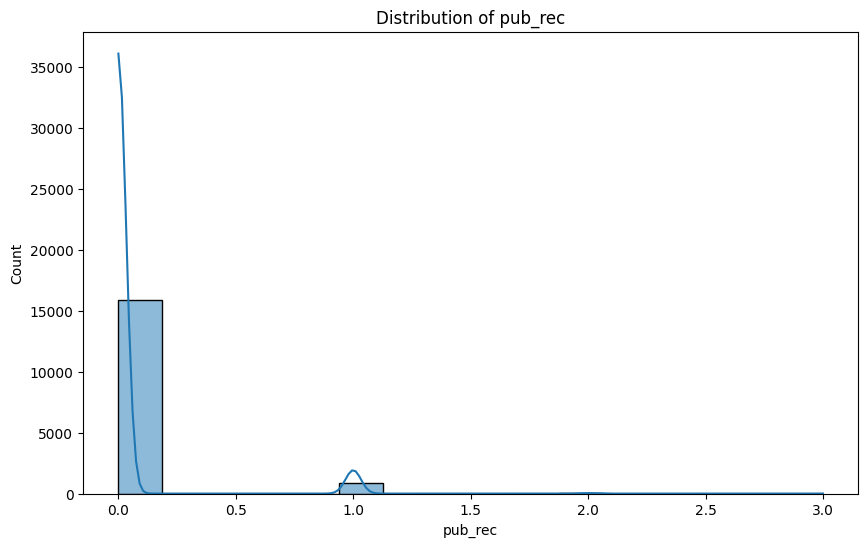

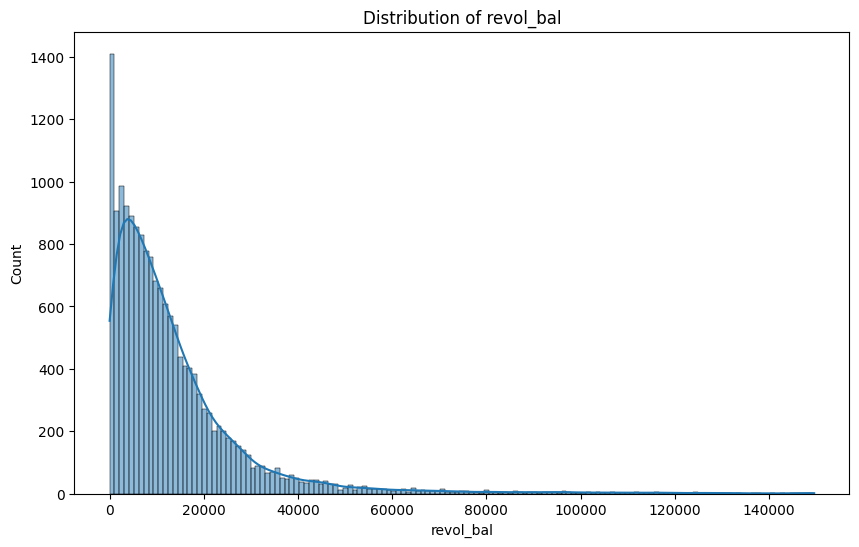

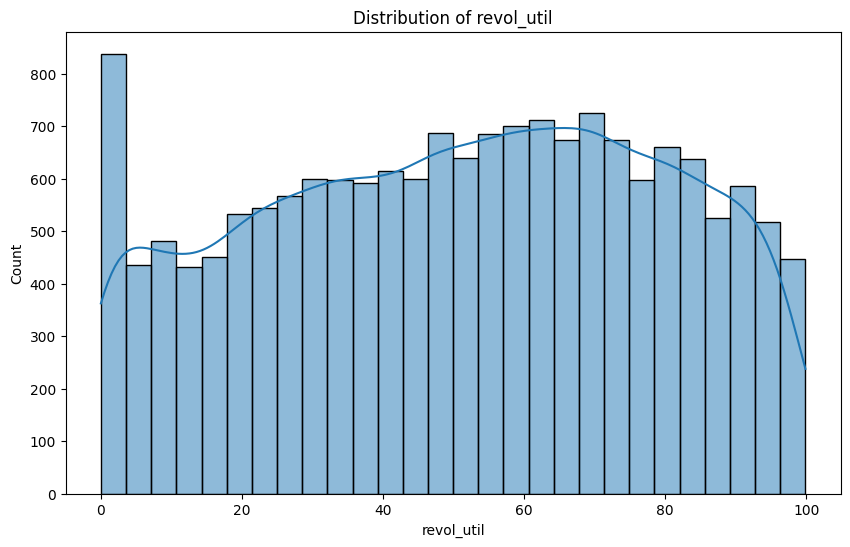

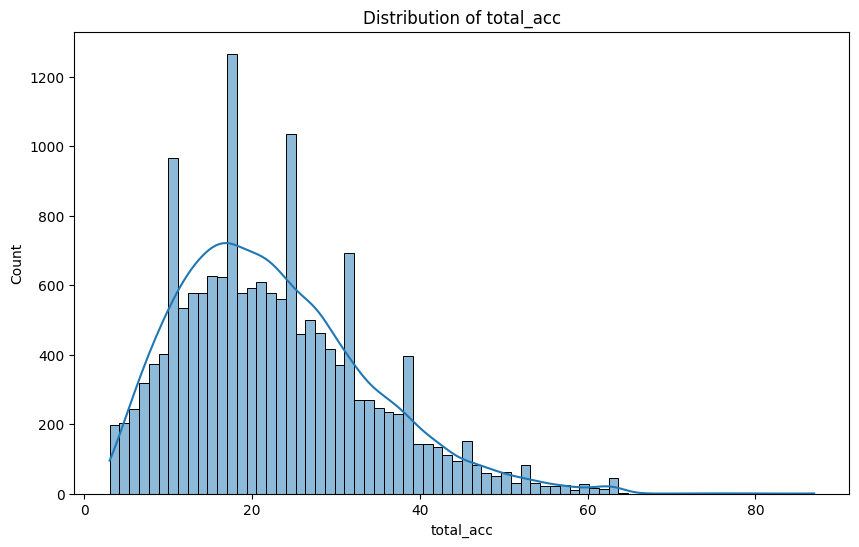

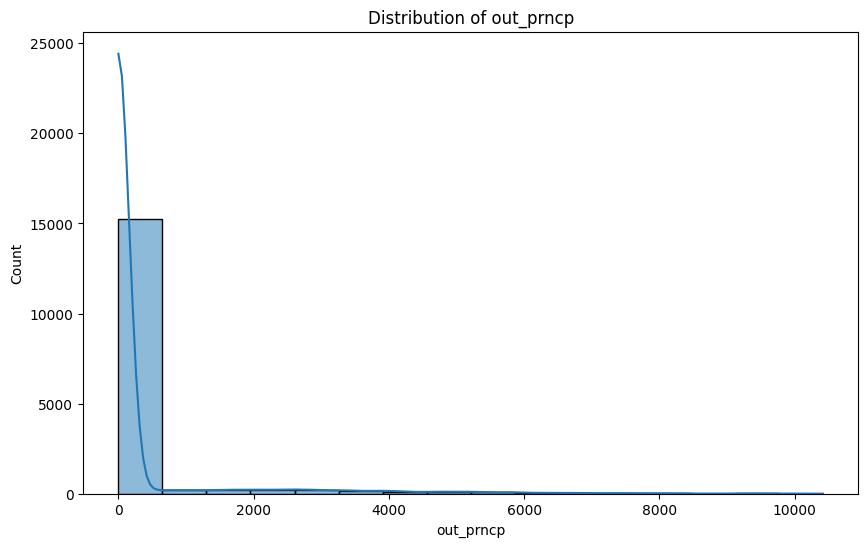

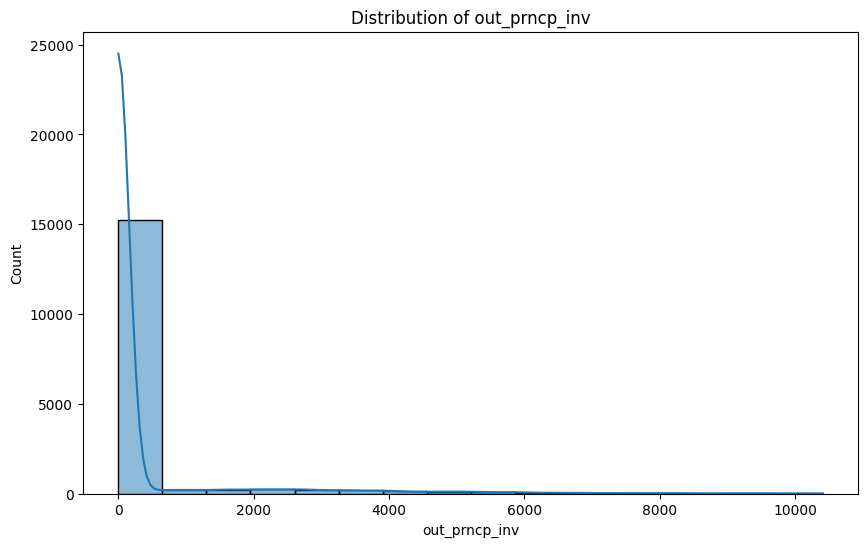

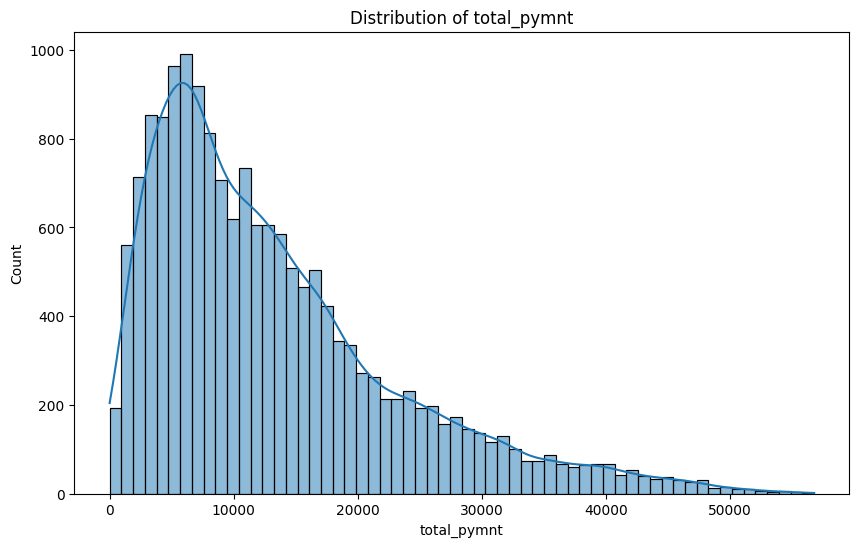

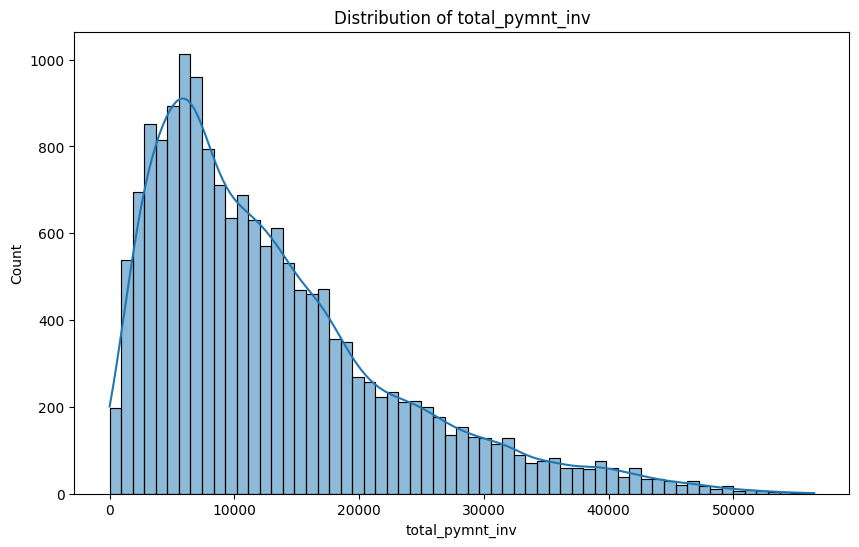

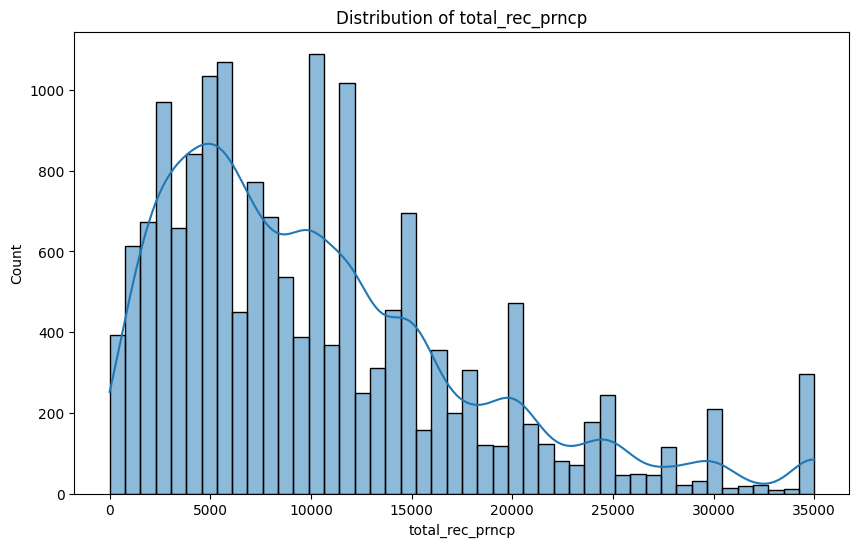

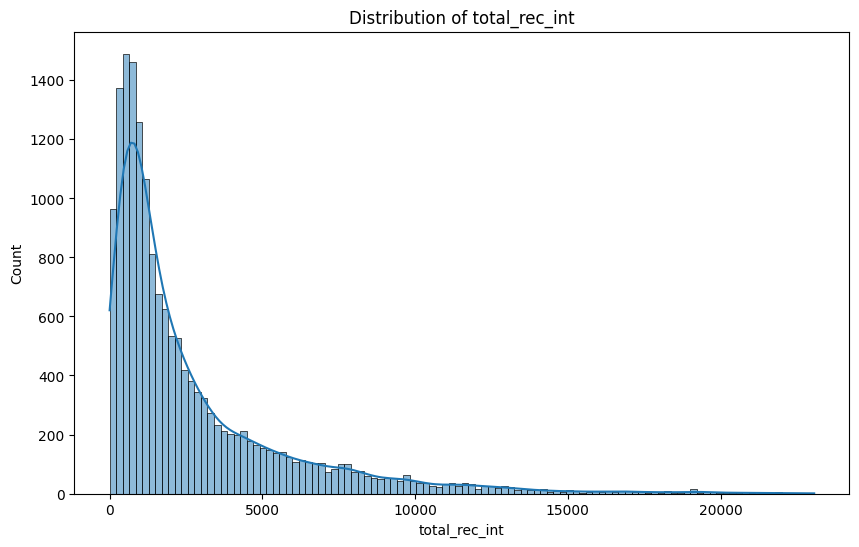

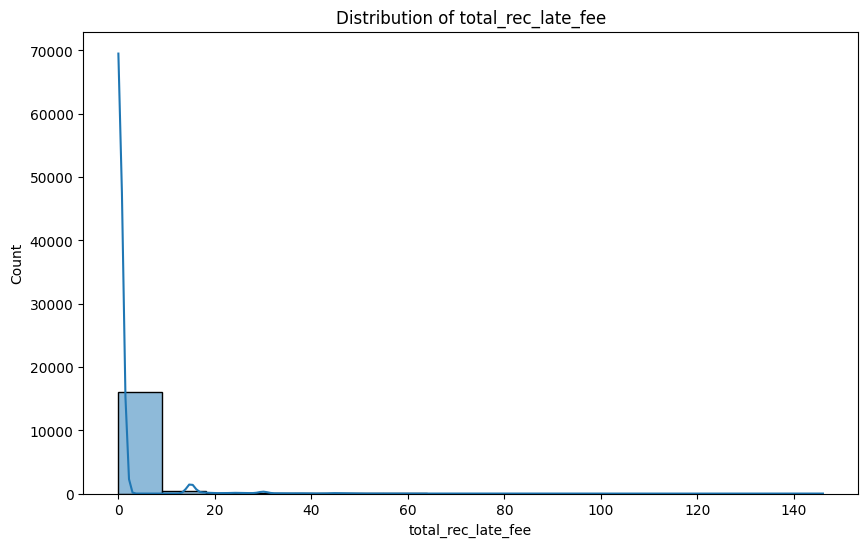

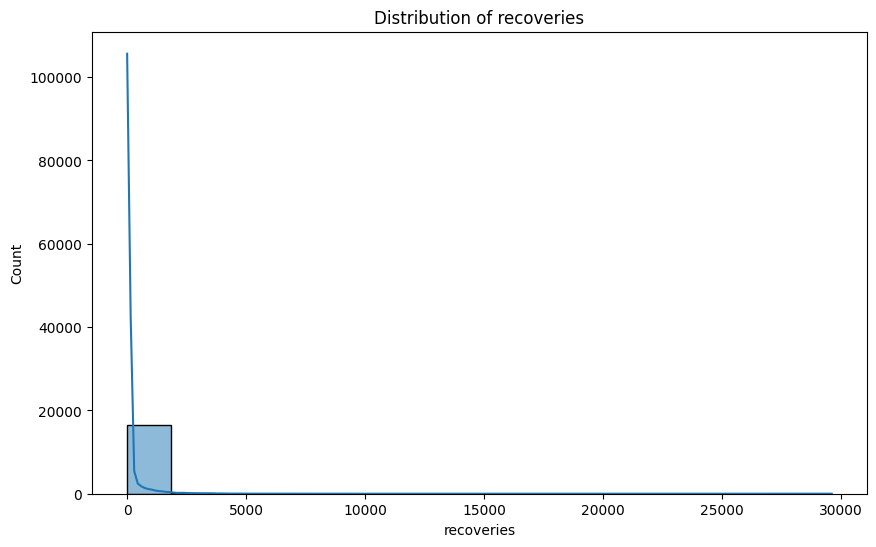

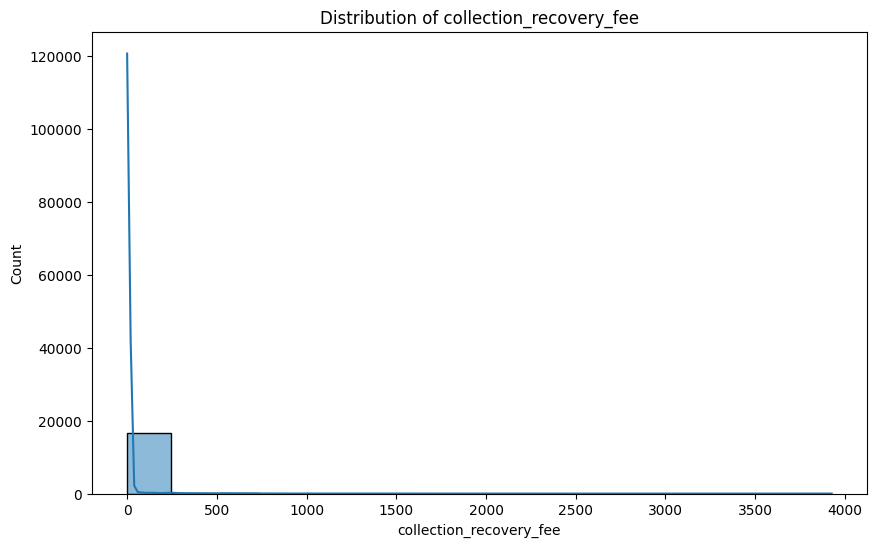

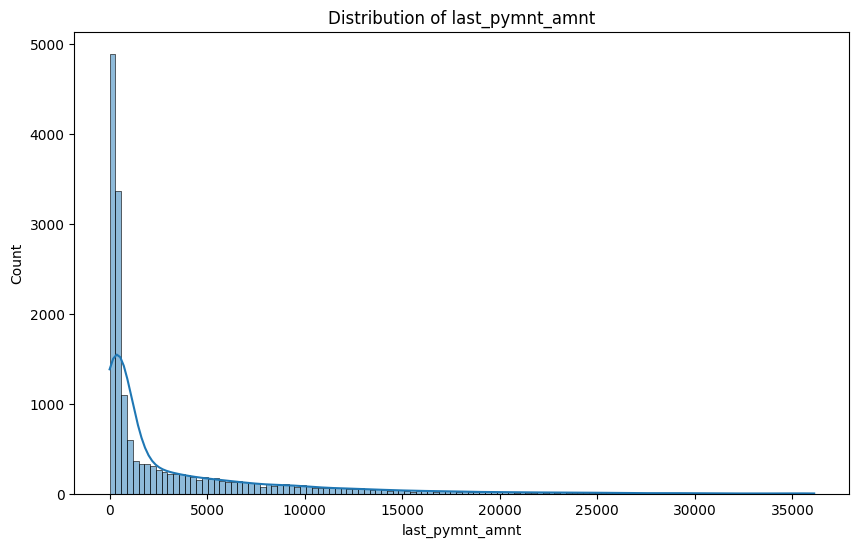

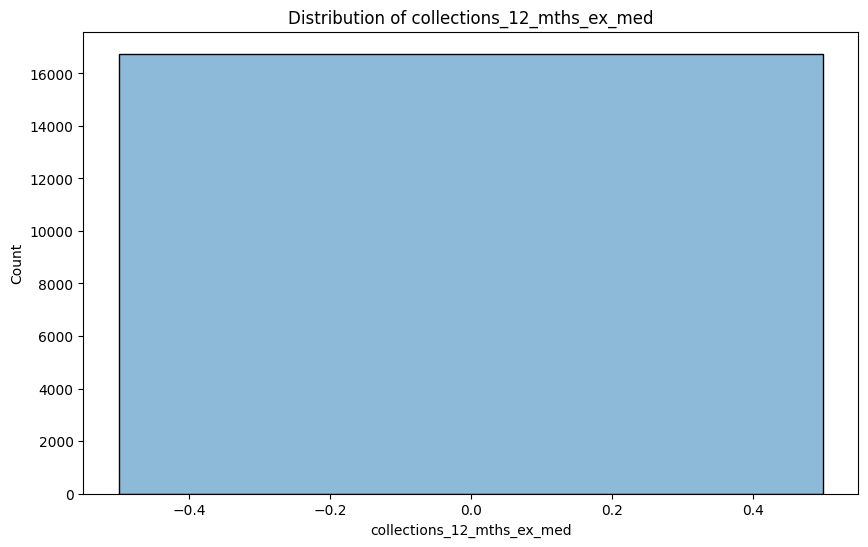

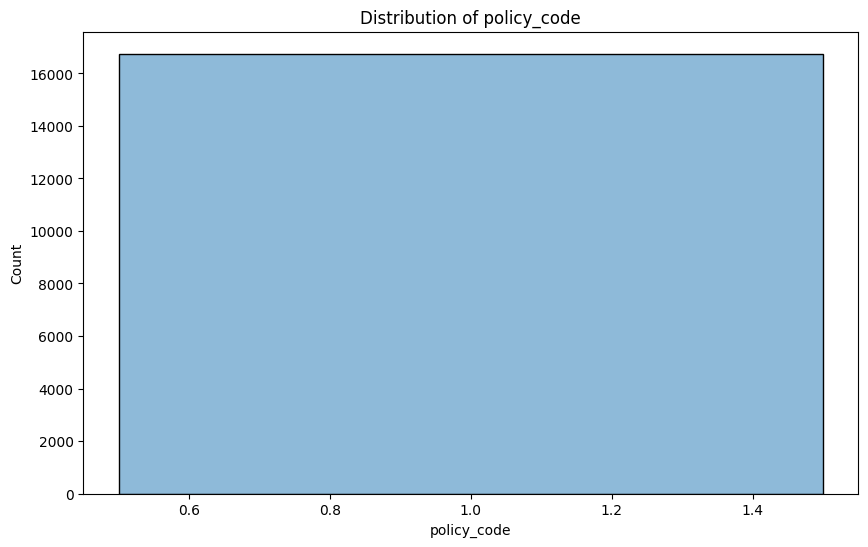

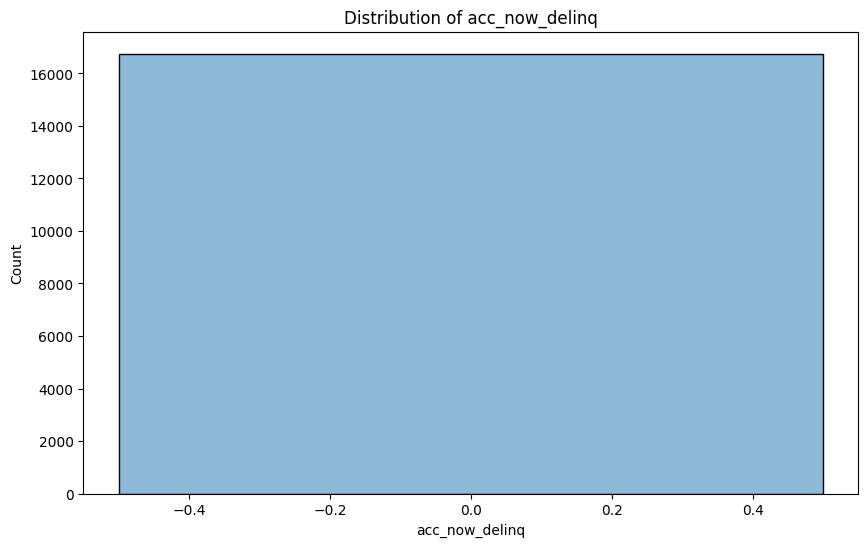

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram untuk variabel numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


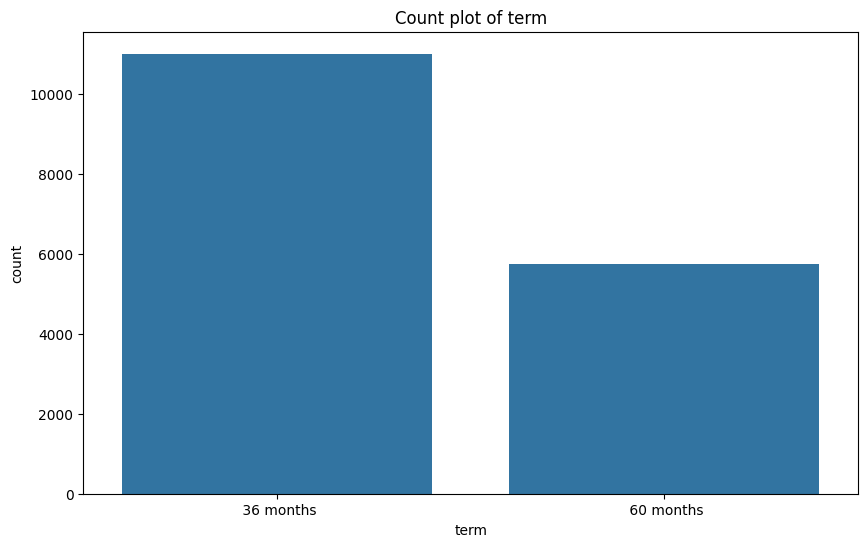

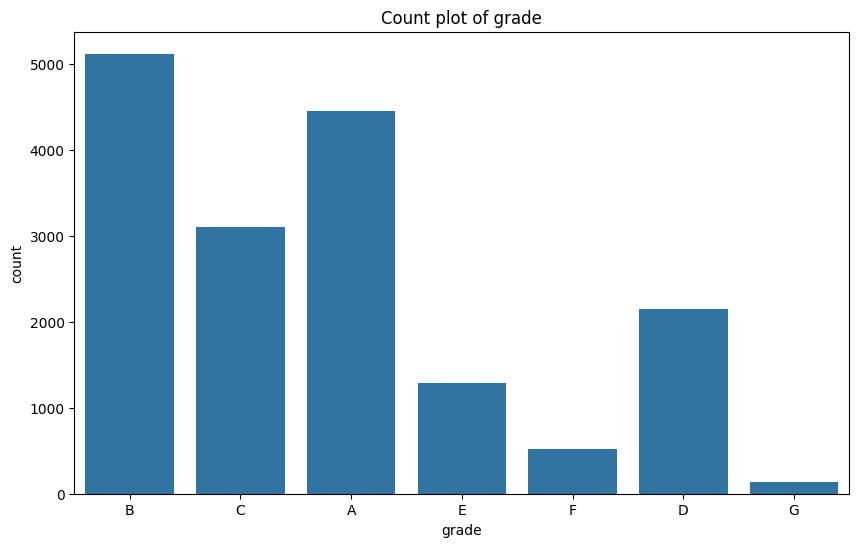

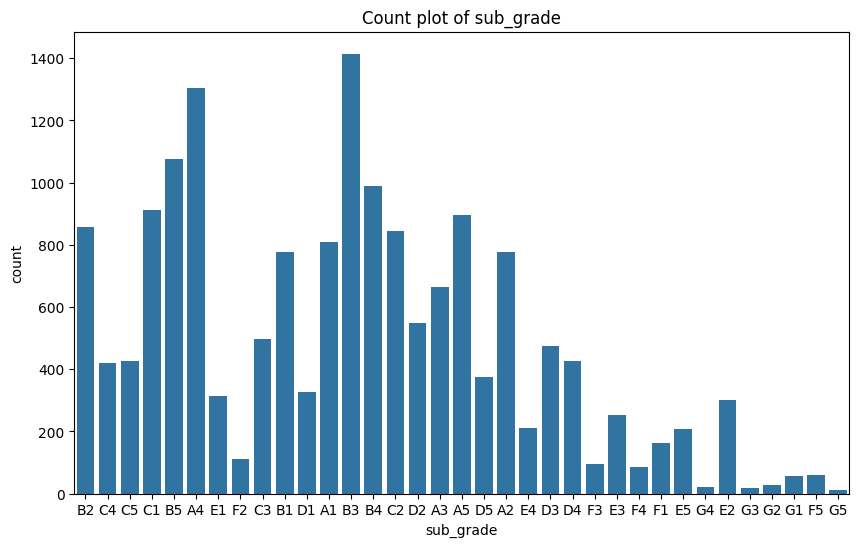

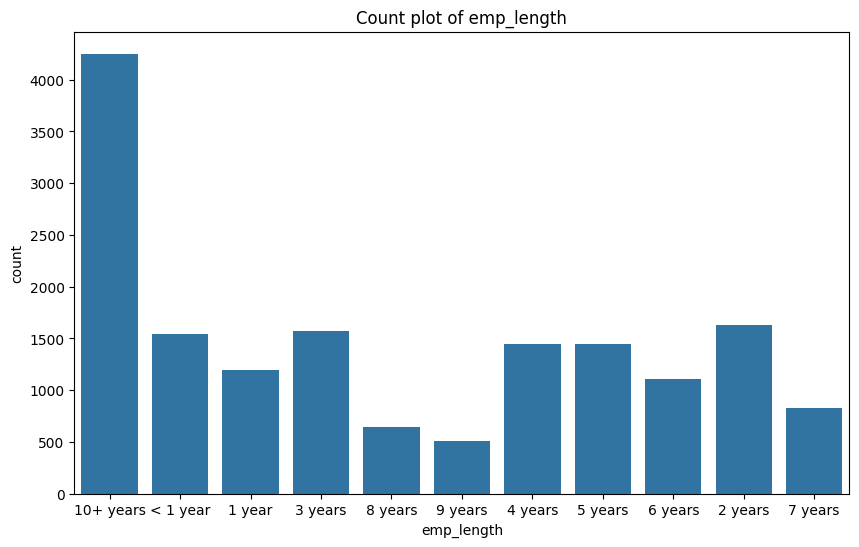

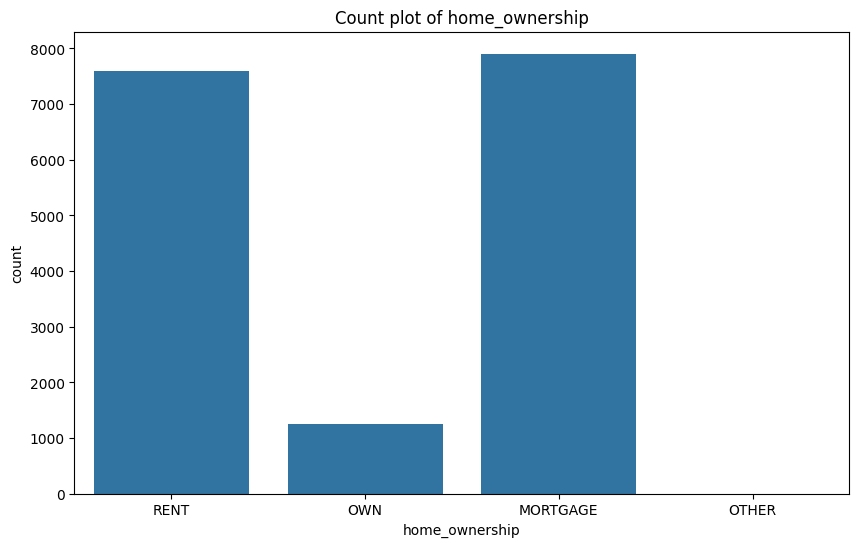

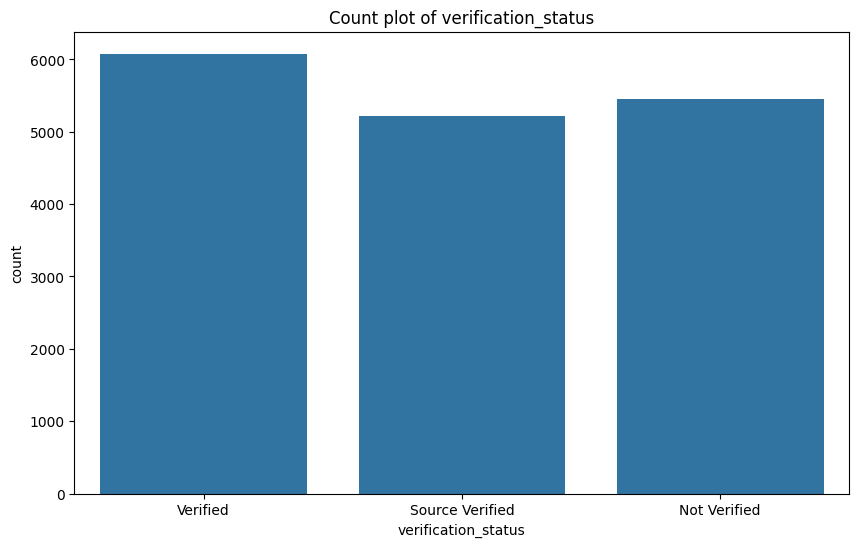

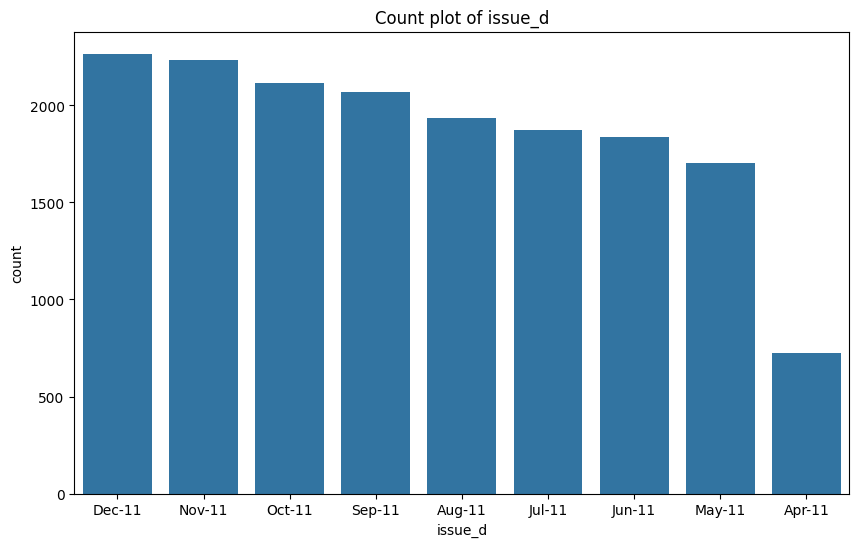

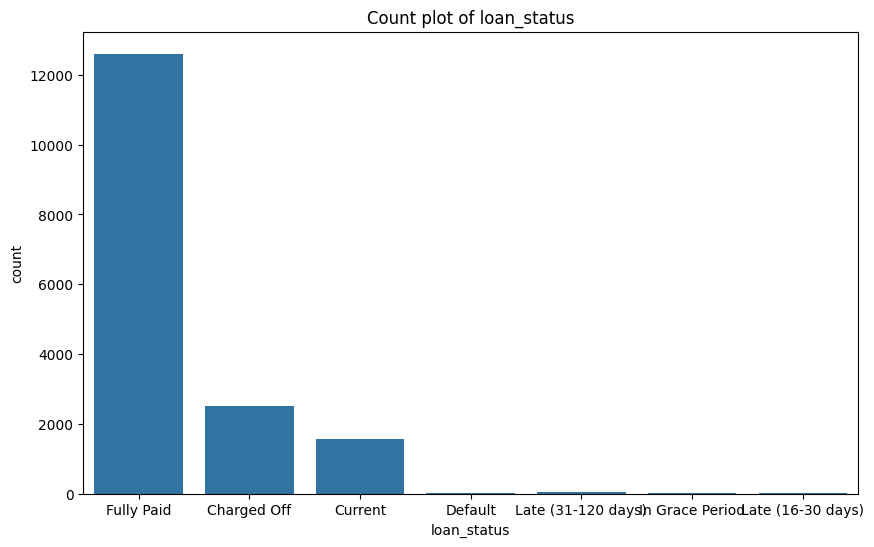

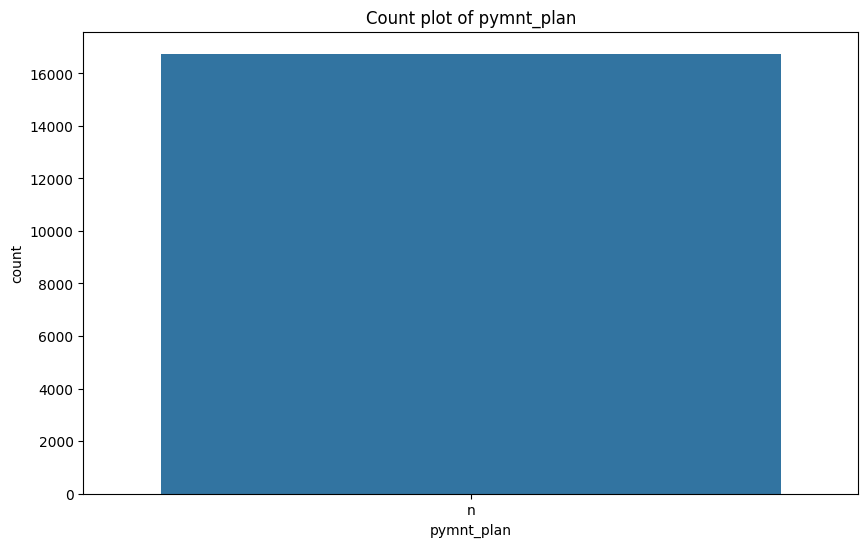

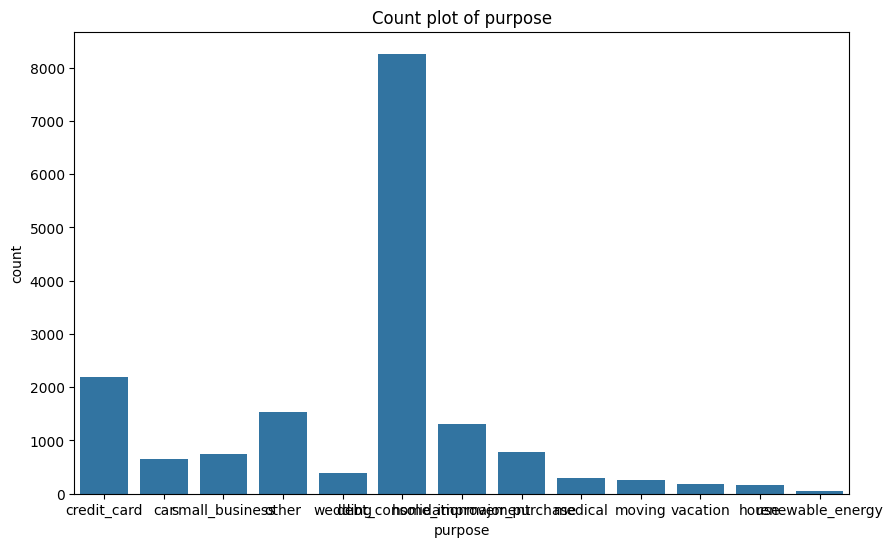

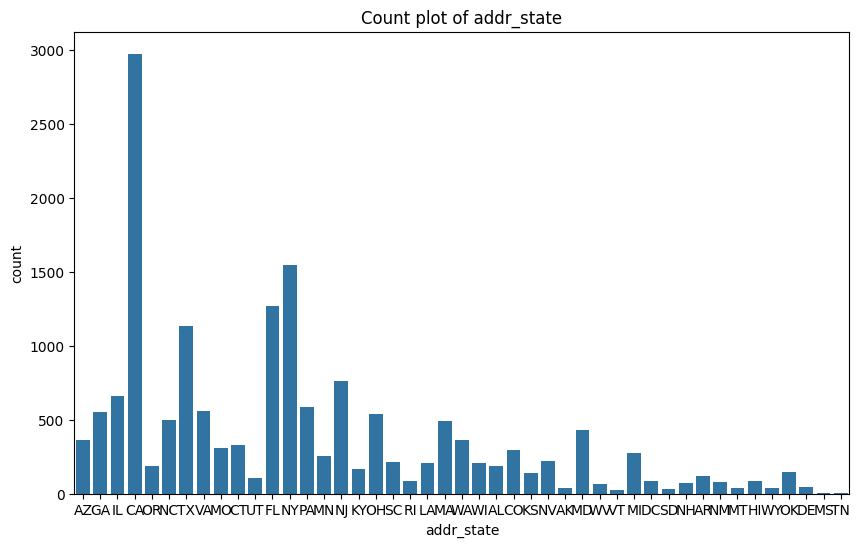

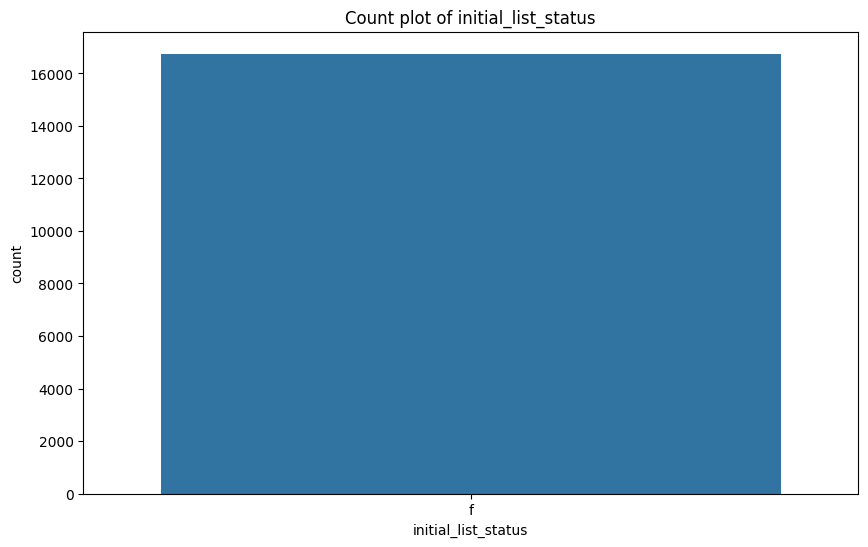

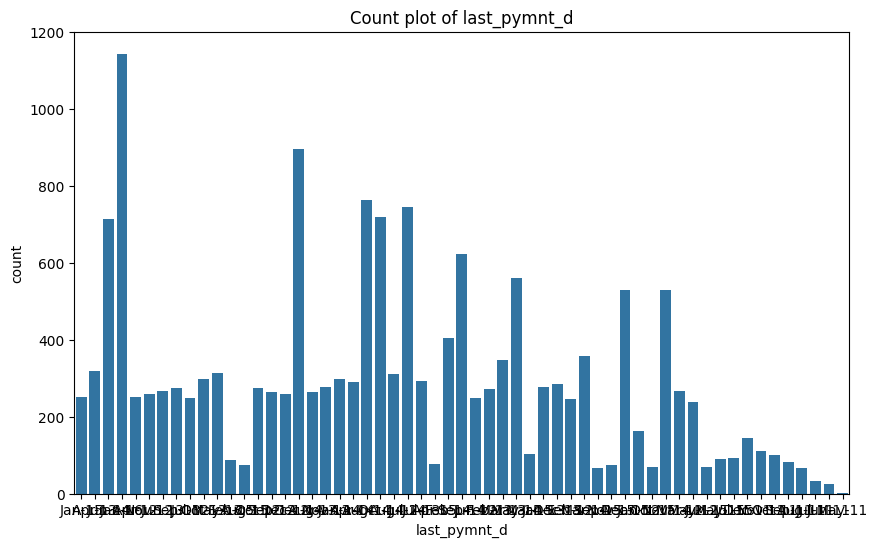

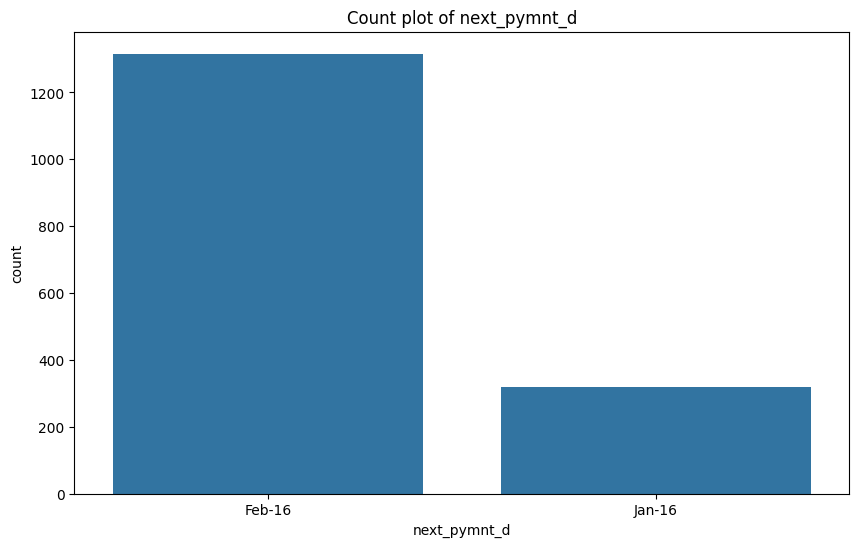

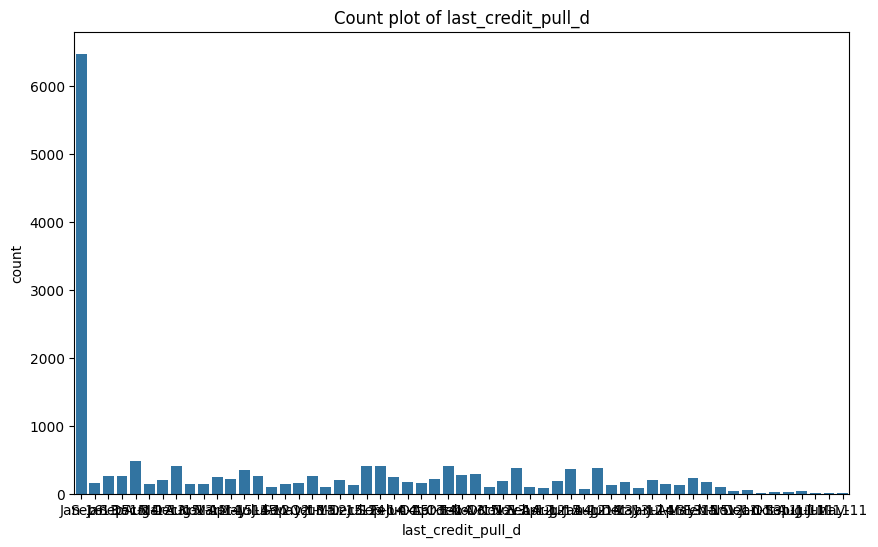

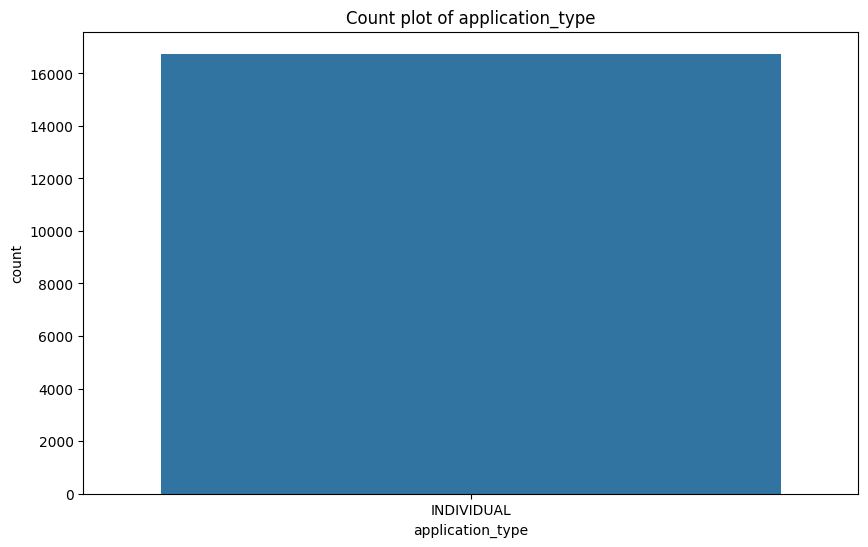

In [209]:

# Count plot untuk variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.show()


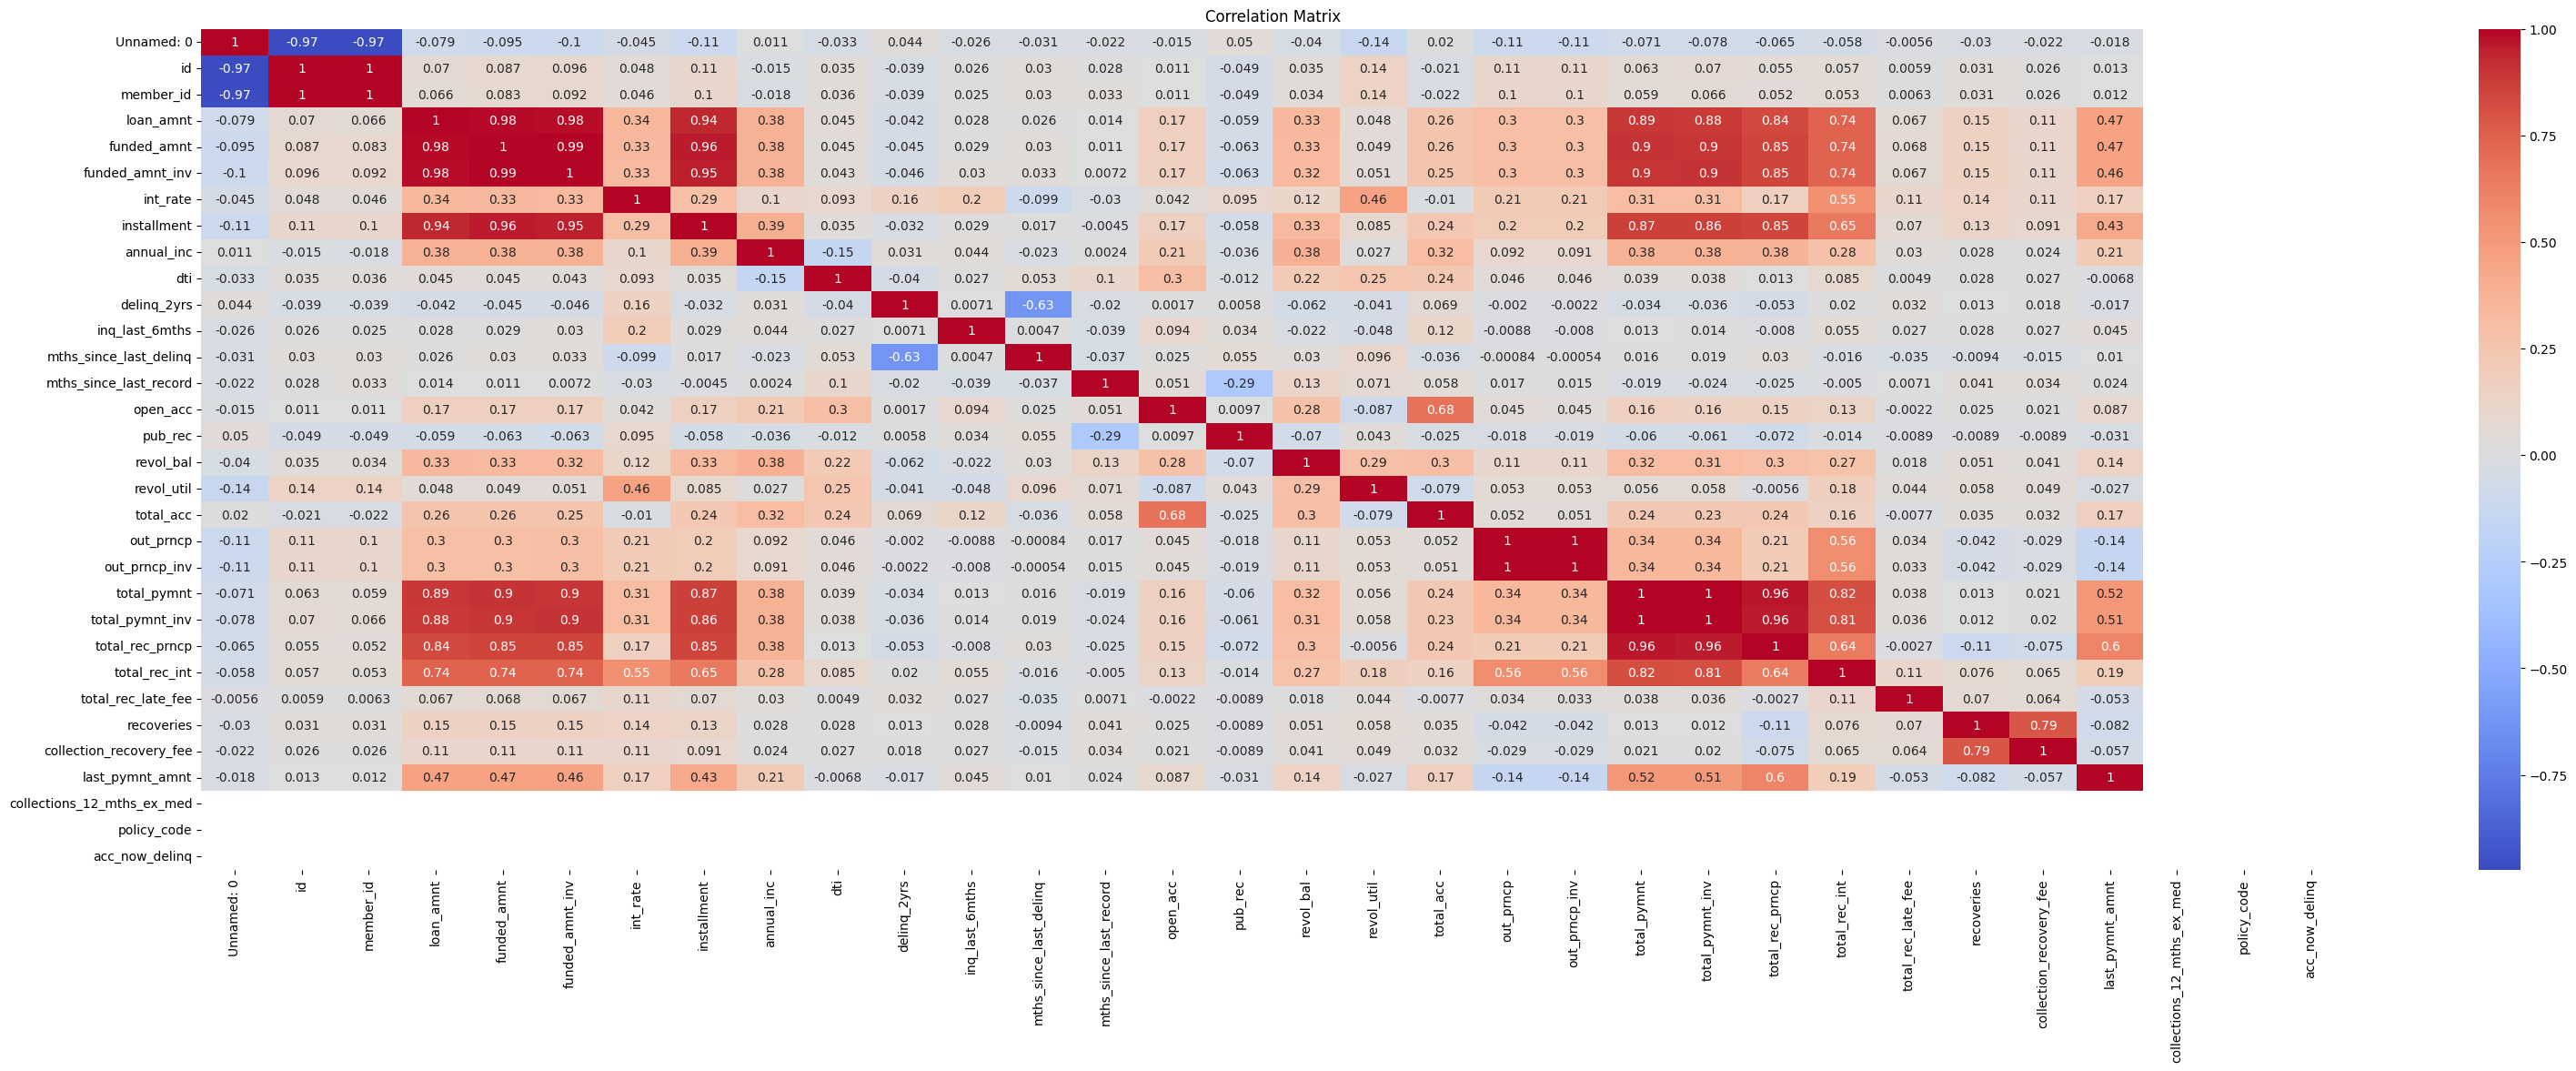

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
16749     Fully Paid
16750     Fully Paid
16751     Fully Paid
16752     Fully Paid
16753    Charged Off
Name: loan_status, Length: 16754, dtype: object


In [210]:
# Korelasi antar variabel numerik
plt.figure(figsize=(38, 12))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(df['loan_status'])


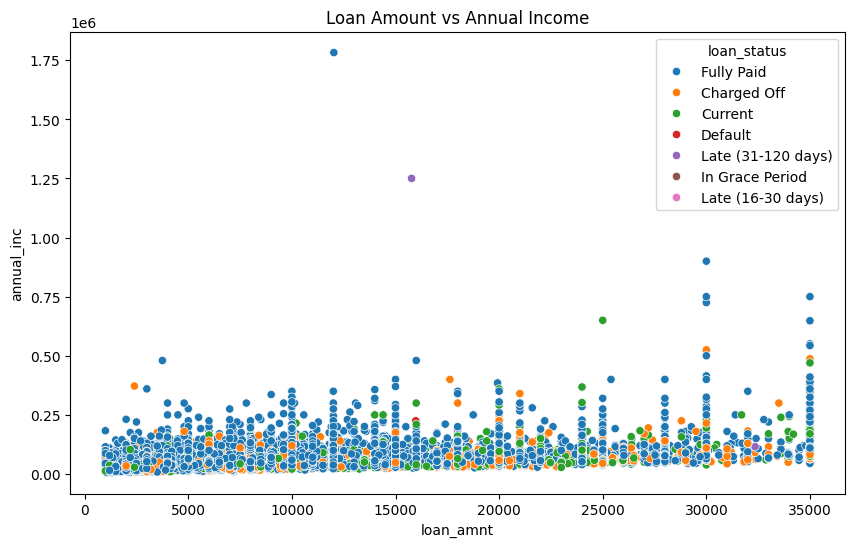

In [211]:
# Scatter plot contoh bivariat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='annual_inc', hue='loan_status')
plt.title('Loan Amount vs Annual Income')
plt.show()


In [212]:
dt = df
dt.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1.0,INDIVIDUAL,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1.0,INDIVIDUAL,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1.0,INDIVIDUAL,0.0


In [213]:
df = dt
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1.0,INDIVIDUAL,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1.0,INDIVIDUAL,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1.0,INDIVIDUAL,0.0


In [214]:
# Mengisi nilai yang hilang dengan mean untuk kolom numerik
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Mengisi nilai yang hilang dengan modus untuk kolom kategorikal
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [215]:

# Mengidentifikasi kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Menghitung Z-score untuk kolom numerik
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Menampilkan ringkasan Z-score untuk memastikan hasilnya
print(z_scores)


       Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
0        1.731947  1.691420   1.567157   0.870300     0.874883   
1        1.731741  1.690780   1.709855   1.168433     1.185446   
2        1.731534  1.688482   1.704632   1.180358     1.197869   
3        1.731327  1.685670   1.409408   0.274036     0.253757   
4        1.731120  1.672106   1.690206   1.108806     1.123334   
...           ...       ...        ...        ...          ...   
16749    1.731120  1.456632   1.460840   0.691421     0.688546   
16750    1.731327  1.456911   1.461108   0.751047     0.750658   
16751    1.731534  1.456939   1.461141   2.075247     2.193479   
16752    1.731741  1.457182   1.461409   0.274036     0.253757   
16753    1.731947  1.457254   1.461474   0.274036     0.253757   

       funded_amnt_inv  int_rate  installment  annual_inc       dti  ...  \
0             0.874526  0.415127     0.822684    0.961845  2.050829  ...   
1             1.186501  0.682312     1.289045    0.8359

In [216]:

outliers=[]
def detect_outliers(data):

    threshold=8
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std

        if np.abs(z_score) > threshold:
            print(np.abs(z_score))
            print(threshold)
            print(np.abs(z_score) > threshold)
            outliers.append(i)


    print(len(outliers))
    return outliers

In [217]:
outlier_pt=detect_outliers(df[numerical_columns]["annual_inc"])

9.54639527860238
8
True
10.070758579908876
8
True
8.602541336250686
8
True
13.741301689054357
8
True
9.022031977295883
8
True
35.91138206829304
8
True
9.923936855543058
8
True
17.411844798199834
8
True
14.265664990360852
8
True
8.602541336250686
8
True
24.752931016490788
8
True
12.168211785134865
8
True
14.265664990360852
8
True
8.749363060616504
8
True
12.126262721030345
8
True
8.392796015728088
8
True
16


In [218]:

outlier_pt = df.loc[df['annual_inc'].isin(outliers), 'annual_inc']

# Ganti nilai outlier dengan nilai lain
replacement_value = 100000  # Nilai yang akan digunakan sebagai pengganti outlier
df.loc[df['annual_inc'].isin(outliers), 'annual_inc'] = replacement_value

# Cetak DataFrame setelah mengganti outlier
print("DataFrame setelah mengganti outlier:")
df.info()

DataFrame setelah mengganti outlier:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16754 entries, 0 to 16753
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  16754 non-null  int64  
 1   id                          16754 non-null  int64  
 2   member_id                   16754 non-null  int64  
 3   loan_amnt                   16754 non-null  int64  
 4   funded_amnt                 16754 non-null  int64  
 5   funded_amnt_inv             16754 non-null  float64
 6   term                        16754 non-null  object 
 7   int_rate                    16754 non-null  float64
 8   installment                 16754 non-null  float64
 9   grade                       16754 non-null  object 
 10  sub_grade                   16754 non-null  object 
 11  emp_length                  16754 non-null  object 
 12  home_ownership              16754 non-null  object 

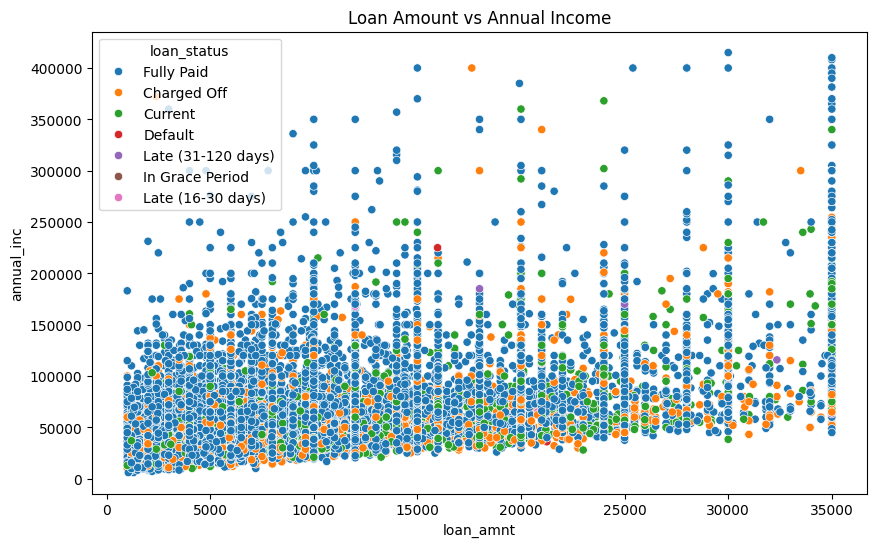

In [219]:
# Scatter plot contoh bivariat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='annual_inc', hue='loan_status')
plt.title('Loan Amount vs Annual Income')
plt.show()

In [220]:

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [221]:

# Membagi data
X = df[numerical_columns]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [230]:


# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)

# Random Forest
rf_clf = RandomForestClassifier()

# Parameter Grid untuk Grid Search
param_grid = {
    'log_reg': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'rf_clf': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    }
}


In [231]:
# Melatih model Logistic Regression
log_reg.fit(X_train, y_train)

# Melatih model Random Forest
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [235]:
# Parameter Grid untuk Grid Search
param_grid_log_reg = {'C': [0.1, 1, 10]}
param_grid_rf_clf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}

# Grid Search untuk Logistic Regression
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)

# Grid Search untuk Random Forest
grid_search_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid_rf_clf, cv=5)
grid_search_rf_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]})

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

# Evaluasi Logistic Regression
y_pred_log_reg = grid_search_log_reg.predict(X_test)
print(f'Logistic Regression - Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Logistic Regression - Precision (macro): {precision_score(y_test, y_pred_log_reg, average="macro")}')
print(f'Logistic Regression - Recall (macro): {recall_score(y_test, y_pred_log_reg, average="macro")}')
print(f'Logistic Regression - ROC AUC (macro): {roc_auc_score(y_test, grid_search_log_reg.predict_proba(X_test), multi_class="ovr", average="macro")}')

# Evaluasi Random Forest
y_pred_rf_clf = grid_search_rf_clf.predict(X_test)
print(f'Random Forest - Accuracy: {accuracy_score(y_test, y_pred_rf_clf)}')
print(f'Random Forest - Precision (macro): {precision_score(y_test, y_pred_rf_clf, average="macro")}')
print(f'Random Forest - Recall (macro): {recall_score(y_test, y_pred_rf_clf, average="macro")}')
print(f'Random Forest - ROC AUC (macro): {roc_auc_score(y_test, grid_search_rf_clf.predict_proba(X_test), multi_class="ovr", average="macro")}')


Logistic Regression - Accuracy: 0.9940316323485526
Logistic Regression - Precision (macro): 0.4949431500911872
Logistic Regression - Recall (macro): 0.4730524978892307
Logistic Regression - ROC AUC (macro): 0.9854855665266188


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.9907490301402566
Random Forest - Precision (macro): 0.4223262195711129
Random Forest - Recall (macro): 0.42289851916376303
Random Forest - ROC AUC (macro): 0.8593013106282008


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
# Menyusun ringkasan hasil evaluasi
evaluation_results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rf_clf)],
    'Precision (macro)': [precision_score(y_test, y_pred_log_reg, average="macro"), precision_score(y_test, y_pred_rf_clf, average="macro")],
    'Recall (macro)': [recall_score(y_test, y_pred_log_reg, average="macro"), recall_score(y_test, y_pred_rf_clf, average="macro")],
    'ROC AUC (macro)': [roc_auc_score(y_test, grid_search_log_reg.predict_proba(X_test), multi_class="ovr", average="macro"), roc_auc_score(y_test, grid_search_rf_clf.predict_proba(X_test), multi_class="ovr", average="macro")]
}

# Menampilkan hasil evaluasi
evaluation_df = pd.DataFrame(evaluation_results)
print(evaluation_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Logistic Regression  0.994032           0.494943        0.473052   
1        Random Forest  0.990749           0.422326        0.422899   

   ROC AUC (macro)  
0         0.985486  
1         0.859301  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')